## Split - Apply - Combine

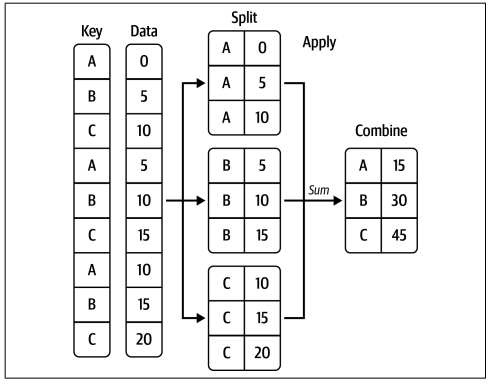

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.DataFrame({"key1":["a", "a", None, "b", "b", "a", None],
                 "key2": pd.Series([1, 2, 1, 2, 1, None, 1], dtype="Int64"), 
                 "data1": np.random.standard_normal(7),
                 "data2": np.random.standard_normal(7)})
df

,key1,key2,data1,data2
0,a,1,-0.846108,1.097977
1,a,2,0.579180,-0.703031
2,None,1,-0.839443,-1.006827
3,b,2,-0.552686,0.271802
4,b,1,0.086980,-1.494358
5,a,<NA>,0.430351,-1.818830
6,None,1,-1.764816,1.103401


In [3]:
# compute mean of data1 using key1

grouped = df["data1"].groupby(df["key1"])
grouped

In [4]:
grouped.mean()

key1
a    0.054474
b   -0.232853
Name: data1, dtype: float64

In [5]:
means = df['data1'].groupby([df["key1"], df["key2"]]).mean()
means

key1  key2
a     1      -0.846108
      2       0.579180
b     1       0.086980
      2      -0.552686
Name: data1, dtype: float64

In [6]:
means.unstack()

key2,1,2
key1,,
a,-0.846108,0.579180
b,0.086980,-0.552686


In [7]:
states = np.array(["OH", "CA", "CA", "OH", "OH", "CA", "OH"])
years = [2005, 2005, 2006, 2005, 2006, 2005, 2006]

df["data1"].groupby([states, years]).mean()

CA  2005    0.504766
    2006   -0.839443
OH  2005   -0.699397
    2006   -0.838918
Name: data1, dtype: float64

In [8]:
df.groupby("key1").mean()

,key2,data1,data2
key1,,,
a,1.5,0.054474,-0.474628
b,1.5,-0.232853,-0.611278


In [9]:
df.groupby(["key2"]).sum()

,key1,data1,data2
key2,,,
1,ab,-3.363387,-0.299808
2,ab,0.026493,-0.431229


In [10]:
df.groupby(["key1","key2"]).mean()

data1     data2
key1 key2                    
a    1    -0.846108  1.097977
     2     0.579180 -0.703031
b    1     0.086980 -1.494358
     2    -0.552686  0.271802

In [11]:
df.groupby(["key1","key2"]).size()

key1  key2
a     1       1
      2       1
b     1       1
      2       1
dtype: int64

In [12]:
df.groupby(["key1","key2"], dropna=False).size()

key1  key2
a     1       1
      2       1
      <NA>    1
b     1       1
      2       1
NaN   1       2
dtype: int64

In [13]:
df.groupby(["key1"]).count()

,key2,data1,data2
key1,,,
a,2,3,3
b,2,2,2


### Iterating over group

In [14]:
for name, group in df.groupby("key1"):
    print(name)
    print(group)

a
  key1  key2     data1     data2
0    a     1 -0.846108  1.097977
1    a     2  0.579180 -0.703031
5    a  <NA>  0.430351 -1.818830
b
  key1  key2     data1     data2
3    b     2 -0.552686  0.271802
4    b     1  0.086980 -1.494358


In [15]:
for (k1, k2), group in df.groupby(["key1", "key2"]):
    print((k1,k2))
    print(group)

('a', 1)
  key1  key2     data1     data2
0    a     1 -0.846108  1.097977
('a', 2)
  key1  key2    data1     data2
1    a     2  0.57918 -0.703031
('b', 1)
  key1  key2    data1     data2
4    b     1  0.08698 -1.494358
('b', 2)
  key1  key2     data1     data2
3    b     2 -0.552686  0.271802


In [16]:
pieces = {name: group for name, group in df.groupby("key1")}
pieces

{'a':   key1  key2     data1     data2
 0    a     1 -0.846108  1.097977
 1    a     2  0.579180 -0.703031
 5    a  <NA>  0.430351 -1.818830,
 'b':   key1  key2     data1     data2
 3    b     2 -0.552686  0.271802
 4    b     1  0.086980 -1.494358}

In [17]:
pieces['b']

,key1,key2,data1,data2
3,b,2,-0.552686,0.271802
4,b,1,0.086980,-1.494358


### Selecting column and subset of column

In [19]:
df.groupby("key1")[["data2"]].mean()

,data2
key1,
a,-0.474628
b,-0.611278


In [21]:
df.groupby(["key1","key2"])[["data2"]].mean()

data2
key1 key2          
a    1     1.097977
     2    -0.703031
b    1    -1.494358
     2     0.271802

### Grouping with dictionaries and Series

In [22]:
people = pd.DataFrame(np.random.standard_normal((5, 5)),
 ....: columns=["a", "b", "c", "d", "e"],
 ....: index=["Joe", "Steve", "Wanda", "Jill", "Trey"])
people

,a,b,c,d,e
Joe,-1.640289,0.185491,1.475278,0.661239,-0.769409
Steve,-0.287243,-0.145848,1.182533,-0.166396,-0.191732
Wanda,1.870010,-0.032568,1.826776,-0.836766,-0.892723
Jill,0.437734,0.228600,-1.373688,0.074825,1.455586
Trey,0.858557,2.369130,0.742943,0.606567,0.400646


In [24]:
mapping = {"a": "red", "b":"red", "c":"blue", "d":"blue", "e":"red", "f":"orange"}
mapping

{'a': 'red', 'b': 'red', 'c': 'blue', 'd': 'blue', 'e': 'red', 'f': 'orange'}

In [25]:
by_column = people.groupby(mapping, axis=1)

In [27]:
by_column.sum()

,blue,red
Joe,2.136516,-2.224207
Steve,1.016137,-0.624823
Wanda,0.990010,0.944720
Jill,-1.298863,2.121920
Trey,1.349511,3.628333


In [28]:
map_series = pd.Series(mapping)

In [29]:
people.groupby(map_series, axis=1).count()

,blue,red
Joe,2,3
Steve,2,3
Wanda,2,3
Jill,2,3
Trey,2,3


### Grouping with function

In [ ]:
people.groupby(len).sum()

## Data Aggregation

In [30]:
df

,key1,key2,data1,data2
0,a,1,-0.846108,1.097977
1,a,2,0.579180,-0.703031
2,None,1,-0.839443,-1.006827
3,b,2,-0.552686,0.271802
4,b,1,0.086980,-1.494358
5,a,<NA>,0.430351,-1.818830
6,None,1,-1.764816,1.103401


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key1    5 non-null      object 
 1   key2    6 non-null      Int64  
 2   data1   7 non-null      float64
 3   data2   7 non-null      float64
dtypes: Int64(1), float64(2), object(1)
memory usage: 359.0+ bytes


In [32]:
grouped = df.groupby("key1")
grouped

In [34]:
grouped["data1"].nsmallest()

key1   
a     0   -0.846108
      5    0.430351
      1    0.579180
b     3   -0.552686
      4    0.086980
Name: data1, dtype: float64

In [36]:
def peak_to_peak(group):
    return group.max() - group.min()

In [37]:
grouped.agg(peak_to_peak)

,key2,data1,data2
key1,,,
a,1,1.425288,2.916807
b,1,0.639667,1.766160


In [38]:
grouped.describe()

key2                                           data1            ...  \
     count mean       std  min   25%  50%   75%  max count      mean  ...   
key1                                                                  ...   
a      2.0  1.5  0.707107  1.0  1.25  1.5  1.75  2.0   3.0  0.054474  ...   
b      2.0  1.5  0.707107  1.0  1.25  1.5  1.75  2.0   2.0 -0.232853  ...   

                        data2                                          \
           75%      max count      mean       std       min       25%   
key1                                                                    
a     0.504766  0.57918   3.0 -0.474628  1.471756 -1.818830 -1.260931   
b    -0.072936  0.08698   2.0 -0.611278  1.248864 -1.494358 -1.052818   

                                    
           50%       75%       max  
key1                                
a    -0.703031  0.197473  1.097977  
b    -0.611278 -0.169738  0.271802  

[2 rows x 24 columns]

### Column-wise and multiple function applications

In [39]:
tips = pd.read_csv('tips.csv')

In [40]:
tips = tips.drop(["sex", "time"], axis=1)

In [41]:
tips.head()

,total_bill,tip,smoker,day,size
0,16.99,1.01,No,Sun,2
1,10.34,1.66,No,Sun,3
2,21.01,3.50,No,Sun,3
3,23.68,3.31,No,Sun,2
4,24.59,3.61,No,Sun,4


In [42]:
tips['tips_pct'] = tips["tip"]/tips['total_bill']

In [43]:
grouped = tips.groupby(["day", "smoker"])

In [44]:
grouped_pct = grouped["tips_pct"]

In [45]:
grouped_pct.agg("mean")

day   smoker
Fri   No        0.151650
      Yes       0.174783
Sat   No        0.158048
      Yes       0.147906
Sun   No        0.160113
      Yes       0.187250
Thur  No        0.160298
      Yes       0.163863
Name: tips_pct, dtype: float64

In [46]:
grouped_pct.agg(["mean", "sum", "std", peak_to_peak])

mean       sum       std  peak_to_peak
day  smoker                                            
Fri  No      0.151650  0.606602  0.028123      0.067349
     Yes     0.174783  2.621746  0.051293      0.159925
Sat  No      0.158048  7.112145  0.039767      0.235193
     Yes     0.147906  6.212055  0.061375      0.290095
Sun  No      0.160113  9.126438  0.042347      0.193226
     Yes     0.187250  3.557756  0.154134      0.644685
Thur No      0.160298  7.213414  0.038774      0.193350
     Yes     0.163863  2.785676  0.039389      0.151240

In [47]:
grouped_pct.agg([("average", "mean"), ("stdev", np.std)])

average     stdev
day  smoker                    
Fri  No      0.151650  0.028123
     Yes     0.174783  0.051293
Sat  No      0.158048  0.039767
     Yes     0.147906  0.061375
Sun  No      0.160113  0.042347
     Yes     0.187250  0.154134
Thur No      0.160298  0.038774
     Yes     0.163863  0.039389

In [48]:
functions = ["count", "mean", "max"]
result = grouped[["tips_pct", "total_bill"]].agg(functions)
result

tips_pct                     total_bill                  
               count      mean       max      count       mean    max
day  smoker                                                          
Fri  No            4  0.151650  0.187735          4  18.420000  22.75
     Yes          15  0.174783  0.263480         15  16.813333  40.17
Sat  No           45  0.158048  0.291990         45  19.661778  48.33
     Yes          42  0.147906  0.325733         42  21.276667  50.81
Sun  No           57  0.160113  0.252672         57  20.506667  48.17
     Yes          19  0.187250  0.710345         19  24.120000  45.35
Thur No           45  0.160298  0.266312         45  17.113111  41.19
     Yes          17  0.163863  0.241255         17  19.190588  43.11

In [49]:
result["tips_pct"]

count      mean       max
day  smoker                           
Fri  No          4  0.151650  0.187735
     Yes        15  0.174783  0.263480
Sat  No         45  0.158048  0.291990
     Yes        42  0.147906  0.325733
Sun  No         57  0.160113  0.252672
     Yes        19  0.187250  0.710345
Thur No         45  0.160298  0.266312
     Yes        17  0.163863  0.241255

In [50]:
grouped.agg({"tip":np.max, "size":sum})

tip  size
day  smoker             
Fri  No       3.50     9
     Yes      4.73    31
Sat  No       9.00   115
     Yes     10.00   104
Sun  No       6.00   167
     Yes      6.50    49
Thur No       6.70   112
     Yes      5.00    40

In [52]:
grouped.agg({"tips_pct":["min", "max","mean","std"], "size":sum})

tips_pct                               size
                  min       max      mean       std  sum
day  smoker                                             
Fri  No      0.120385  0.187735  0.151650  0.028123    9
     Yes     0.103555  0.263480  0.174783  0.051293   31
Sat  No      0.056797  0.291990  0.158048  0.039767  115
     Yes     0.035638  0.325733  0.147906  0.061375  104
Sun  No      0.059447  0.252672  0.160113  0.042347  167
     Yes     0.065660  0.710345  0.187250  0.154134   49
Thur No      0.072961  0.266312  0.160298  0.038774  112
     Yes     0.090014  0.241255  0.163863  0.039389   40

### Returning aggregated data without row inde

In [53]:
tips.groupby(["day","smoker"], as_index=False).mean()

,day,smoker,total_bill,tip,size,tips_pct
0,Fri,No,18.420000,2.812500,2.250000,0.151650
1,Fri,Yes,16.813333,2.714000,2.066667,0.174783
2,Sat,No,19.661778,3.102889,2.555556,0.158048
3,Sat,Yes,21.276667,2.875476,2.476190,0.147906
4,Sun,No,20.506667,3.167895,2.929825,0.160113
5,Sun,Yes,24.120000,3.516842,2.578947,0.187250
6,Thur,No,17.113111,2.673778,2.488889,0.160298
7,Thur,Yes,19.190588,3.030000,2.352941,0.163863


## Apply -> Split- apply - combine

In [54]:
def top(df, n=5, column ="tips_pct"):
    return df.sort_values(column, ascending=False)[:n]

In [55]:
top(tips, n=6)

,total_bill,tip,smoker,day,size,tips_pct
172,7.25,5.15,Yes,Sun,2,0.710345
178,9.60,4.00,Yes,Sun,2,0.416667
67,3.07,1.00,Yes,Sat,1,0.325733
232,11.61,3.39,No,Sat,2,0.291990
183,23.17,6.50,Yes,Sun,4,0.280535
109,14.31,4.00,Yes,Sat,2,0.279525


In [57]:
tips.groupby("smoker").apply(top)

total_bill   tip smoker   day  size  tips_pct
smoker                                                   
No     232       11.61  3.39     No   Sat     2  0.291990
       149        7.51  2.00     No  Thur     2  0.266312
       51        10.29  2.60     No   Sun     2  0.252672
       185       20.69  5.00     No   Sun     5  0.241663
       88        24.71  5.85     No  Thur     2  0.236746
Yes    172        7.25  5.15    Yes   Sun     2  0.710345
       178        9.60  4.00    Yes   Sun     2  0.416667
       67         3.07  1.00    Yes   Sat     1  0.325733
       183       23.17  6.50    Yes   Sun     4  0.280535
       109       14.31  4.00    Yes   Sat     2  0.279525

In [59]:
tips.groupby(["smoker", "day"]).apply(top, n=1, column = "total_bill")

total_bill    tip smoker   day  size  tips_pct
smoker day                                                     
No     Fri  94        22.75   3.25     No   Fri     2  0.142857
       Sat  212       48.33   9.00     No   Sat     4  0.186220
       Sun  156       48.17   5.00     No   Sun     6  0.103799
       Thur 142       41.19   5.00     No  Thur     5  0.121389
Yes    Fri  95        40.17   4.73    Yes   Fri     4  0.117750
       Sat  170       50.81  10.00    Yes   Sat     3  0.196812
       Sun  182       45.35   3.50    Yes   Sun     3  0.077178
       Thur 197       43.11   5.00    Yes  Thur     4  0.115982

In [61]:
result = tips.groupby("smoker")["tips_pct"].describe()
result

,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
No,151.0,0.159328,0.039910,0.056797,0.136906,0.155625,0.185014,0.291990
Yes,93.0,0.163196,0.085119,0.035638,0.106771,0.153846,0.195059,0.710345


In [62]:
result.unstack()

       smoker
count  No        151.000000
       Yes        93.000000
mean   No          0.159328
       Yes         0.163196
std    No          0.039910
       Yes         0.085119
min    No          0.056797
       Yes         0.035638
25%    No          0.136906
       Yes         0.106771
50%    No          0.155625
       Yes         0.153846
75%    No          0.185014
       Yes         0.195059
max    No          0.291990
       Yes         0.710345
dtype: float64

In [63]:
tips.groupby("smoker", group_keys=False).apply(top) # No hierarchical index

,total_bill,tip,smoker,day,size,tips_pct
232,11.61,3.39,No,Sat,2,0.291990
149,7.51,2.00,No,Thur,2,0.266312
51,10.29,2.60,No,Sun,2,0.252672
185,20.69,5.00,No,Sun,5,0.241663
88,24.71,5.85,No,Thur,2,0.236746
172,7.25,5.15,Yes,Sun,2,0.710345
178,9.60,4.00,Yes,Sun,2,0.416667
67,3.07,1.00,Yes,Sat,1,0.325733
183,23.17,6.50,Yes,Sun,4,0.280535
109,14.31,4.00,Yes,Sat,2,0.279525
